In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import seaborn as sns

# Reading the file



In [214]:
data = pd.read_excel(r"/content/merged_tweets.xlsx")

In [124]:
data

,tweet_id,text,Label
0,1359862972739371009,@MalikAltayeb1 @aswagalmal كلام عين العقل ...\...,F
1,1358000045350658048,سبحان الله صارو العملاء يدعون الإلهية وهم يتنب...,T
2,1357792268699242497,الحاصل أن الحكام العملاء الذين أفنوا أعمارهم ف...,T
3,1350595656293998592,الوصف المثالي لسنه الي اشتغلتها في ماكدونالدز ...,T
4,1349239790252797953,نُطالب بحاكم مسلم الان لإصلاح السودان وطرد الع...,T
...,...,...,...
55891,949429796546732033,@saudq1978 #كلنا_سلمان_كلنا_محمد\nاوامر خير لش...,F
55892,1015940006978912257,@r2wwww @deep_71023 اوجعتي قلبي حسبي الله وكفى...,F
55893,1051670259722260480,#كلنا_ثقه_في_محمد_بن_سلمان\n\nاوطنا دون حدك اس...,F
55894,1243950429488250880,@7Ggg1o3GhlR9eCK @The_Saudi_girl اوف لا والله ...,F


# Cleaning and preprocessing

In [125]:
data.drop(columns=['tweet_id'],inplace=True)

In [126]:
data = data.astype(str)

In [127]:
class preprocessing:
  arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


  def normalize(sentence):
    sentence = re.sub(r'[^\u0600-\u06FF\s😀-🙏]+', '', sentence)
    sentence = re.sub(r'@[A-Za-z0-9_]+', '', sentence)
    sentence = re.sub(r'https?://[^\s]+', '', sentence)
    sentence = re.sub(r'[!.,;?]+', ' ', sentence)
    sentence = re.sub("[إأآا]", "ا", sentence)
    sentence = re.sub("ى", "ي", sentence)
    sentence = re.sub("ؤ", "ء", sentence)
    sentence = re.sub("ئ", "ء", sentence)
    sentence = re.sub("ة", "ه", sentence)
    sentence = re.sub("گ", "ك", sentence)
    sentence = re.sub(r'\n', '', sentence)
    return sentence

  def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

  def remove_repeating_char(sentence):
    return re.sub(r'(.)\1+', r'\1', sentence)

  def remove_punkt(sentence):
    text = re.sub(r'[^\w\s]',"",sentence)
    return text
  def preprocess(sentence):
    clean = preprocessing.normalize(sentence)
    clean = preprocessing.remove_punkt(clean)
    return clean

In [128]:
data['text'] = data['text'].apply(preprocessing.preprocess)

In [129]:
data

,text,Label
0,كلام عين العقل دكتاتور علي العملاء والخونه ع...,F
1,سبحان الله صارو العملاء يدعون الالهيه وهم يتنب...,T
2,الحاصل ان الحكام العملاء الذين افنوا اعمارهم ف...,T
3,الوصف المثالي لسنه الي اشتغلتها في ماكدونالدز ...,T
4,نطالب بحاكم مسلم الان لاصلاح السودان وطرد العم...,T
...,...,...
55891,كلناسلمانكلنامحمداوامر خير لشعب الخيربالنسبه ...,F
55892,اوجعتي قلبي حسبي الله وكفي كلنا امل في حكومه...,F
55893,كلناثقهفيمحمدبنسلماناوطنا دون حدك اسود ال سعود...,F
55894,اوف لا والله طالت وشمخت لا الوضع ماينسكت علي...,F


In [130]:
data.isna().sum()

text     0
Label    0
dtype: int64

In [131]:
data["Label"] = data["Label"].map({'T': 1,'F' :0 })

In [132]:
data

,text,Label
0,كلام عين العقل دكتاتور علي العملاء والخونه ع...,0
1,سبحان الله صارو العملاء يدعون الالهيه وهم يتنب...,1
2,الحاصل ان الحكام العملاء الذين افنوا اعمارهم ف...,1
3,الوصف المثالي لسنه الي اشتغلتها في ماكدونالدز ...,1
4,نطالب بحاكم مسلم الان لاصلاح السودان وطرد العم...,1
...,...,...
55891,كلناسلمانكلنامحمداوامر خير لشعب الخيربالنسبه ...,0
55892,اوجعتي قلبي حسبي الله وكفي كلنا امل في حكومه...,0
55893,كلناثقهفيمحمدبنسلماناوطنا دون حدك اسود ال سعود...,0
55894,اوف لا والله طالت وشمخت لا الوضع ماينسكت علي...,0


# Graghing data

In [144]:
data["Label"].value_counts()

1    45428
0    10468
Name: Label, dtype: int64

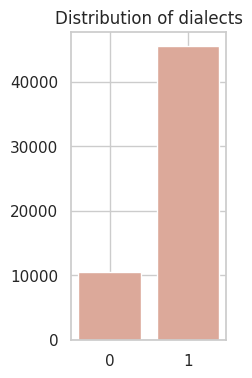

In [211]:
fig = plt.figure(figsize =(2, 4))
plt.bar(data['Label'].value_counts().index, data['Label'].value_counts(),color ='#DCA99A');
plt.title("Distribution of dialects");

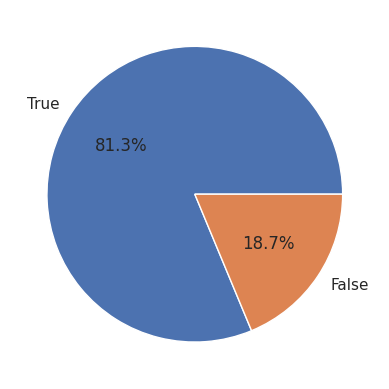

0.23043057145372897


In [212]:
label_count = data['Label'].value_counts()
labels = ['True', 'False']

plt.pie(label_count, labels=labels, autopct='%1.1f%%')

plt.show()

print(label_count[0] / label_count[1])

In [173]:
data['text lenght'] = data['text'].map(lambda i: len(i.split()))

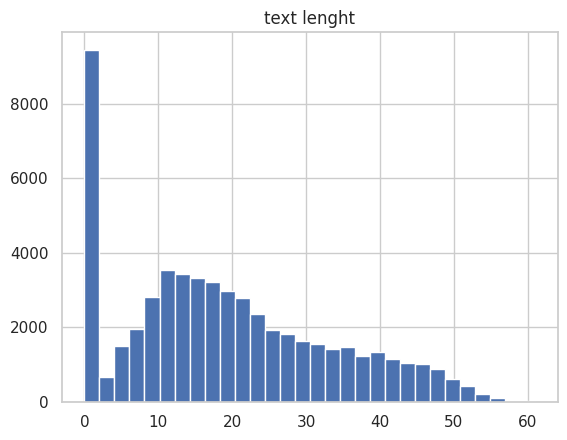

In [174]:
data[['text lenght']].hist(bins = 30)
plt.show()

In [176]:
data['text lenght'].max()

61